In [24]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.neighbors import KNeighborsClassifier
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.impute import KNNImputer
from sklearn.decomposition import PCA
! pip install scikit-optimize
# report scikit-optimize version number
import skopt
print('skopt %s' % skopt.__version__)
from skopt.space import Integer
from sklearn.feature_selection import SequentialFeatureSelector


skopt 0.10.1


In [2]:
#data from kaggle dataset: "Prediction of music genre"
data1 = pd.read_csv("music_genre.csv")
#data from kaggle data set: "Spotify Tracks Dataset"
data2 = pd.read_csv("dataset.csv")

# Data 2

In [3]:
#drop all the rows that are null
data2 = data2.dropna()

## Label encoding variables in data 2

In [4]:
#make track_genre into label encoding
labelencoder = LabelEncoder()
data2['track_genre_num'] = labelencoder.fit_transform(data2['track_genre'])
data2

,Unnamed: 0,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,track_genre_num
0,0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,0
1,1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0
2,2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0
3,3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,0
4,4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,113
113996,113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,113
113997,113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,113
113998,113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,113


In [5]:
features2 = ["popularity", "duration_ms", "danceability", "energy", "key", "loudness", "mode", "speechiness", "acousticness", "instrumentalness", "liveness", "valence", "tempo", "time_signature"]
len(features2)

14

# KNN Classifier Data 2 Baseline

In [6]:
X_train2b, X_test2b, y_train2b, y_test2b = train_test_split(data2[features2], data2["track_genre"], test_size=0.2, random_state=1)
neigh2b = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train2b))))
neigh2b.fit(X_train2b, y_train2b)
knn_test_pred2b = neigh2b.predict(X_test2b)
test_acc2b = accuracy_score(y_test2b, knn_test_pred2b)
print("Accuracy (test):", test_acc2b)
print("Accuracy (train):", accuracy_score(y_train2b, neigh2b.predict(X_train2b)))

Accuracy (test): 0.038157894736842106
Accuracy (train): 0.0500663384466935


In [25]:
print(classification_report(y_test2b, knn_test_pred2b))

/Users/mkobayashi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                   precision    recall  f1-score   support

         acoustic       0.00      0.00      0.00       214
         afrobeat       0.02      0.01      0.01       202
         alt-rock       0.01      0.01      0.01       206
      alternative       0.03      0.05      0.04       201
          ambient       0.00      0.00      0.00       192
            anime       0.03      0.01      0.01       199
      black-metal       0.02      0.01      0.01       195
        bluegrass       0.00      0.00      0.00       178
            blues       0.09      0.10      0.09       229
           brazil       0.00      0.00      0.00       206
        breakbeat       0.01      0.01      0.01       200
          british       0.00      0.00      0.00       187
         cantopop       0.01      0.00      0.01       222
    chicago-house       0.05      0.15      0.07       203
         children       0.05      0.08      0.06       201
            chill       0.02      0.01      0.02       

/Users/mkobayashi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/mkobayashi/anaconda3/lib/python3.11/site-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [7]:
int(np.sqrt(len(X_train2b)))

301

In [8]:
#normalize feature data 2
#norm_feat2 = preprocessing.normalize(data2[features2])
scaler2 = preprocessing.MinMaxScaler()
scaled_feat2 = scaler2.fit_transform(data2[features2])

#train test split
X_train2, X_test2, y_train2, y_test2 = train_test_split(scaled_feat2, data2["track_genre"], test_size=0.2, random_state=1)

# KNN Classifier for data 2

In [9]:

neigh2 = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train2))))
neigh2.fit(X_train2, y_train2)
knn_test_pred2 = neigh2.predict(X_test2)
test_acc2 = accuracy_score(y_test2, knn_test_pred2)
print("Accuracy (test):", test_acc2)
print("Accuracy (train):", accuracy_score(y_train2, neigh2.predict(X_train2)))

"""cm2 = confusion_matrix(y_test2, knn_test_pred2)
ax2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = data2["track_genre"].unique())
ax2.plot()
plt.xticks(rotation=90)
plt.show()"""

Accuracy (test): 0.1693859649122807
Accuracy (train): 0.18481562297832213


'cm2 = confusion_matrix(y_test2, knn_test_pred2)\nax2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = data2["track_genre"].unique())\nax2.plot()\nplt.xticks(rotation=90)\nplt.show()'

In [10]:
int(np.sqrt(len(X_train2)))

301

# KNN Data 2 (attempt 2) feature selection

In [11]:
knn2_2 = KNeighborsClassifier(n_neighbors = int(np.sqrt(len(X_train2))))
sfs2_2 = SequentialFeatureSelector(knn2_2)
sfs2_2.fit(X_train2, y_train2)
sfs2_2.get_feature_names_out

/Users/mkobayashi/anaconda3/lib/python3.11/site-packages/sklearn/feature_selection/_sequential.py:211: FutureWarning: Leaving `n_features_to_select` to None is deprecated in 1.0 and will become 'auto' in 1.3. To keep the same behaviour as with None (i.e. select half of the features) and avoid this warning, you should manually set `n_features_to_select='auto'` and set tol=None when creating an instance.
  warnings.warn(


<bound method SelectorMixin.get_feature_names_out of SequentialFeatureSelector(estimator=KNeighborsClassifier(n_neighbors=301))>

In [12]:
selectedfeat2_2 = sfs2_2.get_support()

In [13]:
#selectedfeat2_2 = np.array([True, False,  True, False, False,  True, False,  True,  True, True, False, False,  True, False])

In [14]:
features2

['popularity',
 'duration_ms',
 'danceability',
 'energy',
 'key',
 'loudness',
 'mode',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'liveness',
 'valence',
 'tempo',
 'time_signature']

In [15]:
features2_2 = [features2[i] for i in range(len(features2)) if selectedfeat2_2[i]]
features2_2

['popularity',
 'danceability',
 'loudness',
 'speechiness',
 'acousticness',
 'instrumentalness',
 'tempo']

In [16]:
[x for x in features2 if x not in features2_2]

['duration_ms',
 'energy',
 'key',
 'mode',
 'liveness',
 'valence',
 'time_signature']

In [17]:
scaler2_2 = preprocessing.MinMaxScaler()
scaled_feat2_2 = scaler2_2.fit_transform(data2[features2_2])

#train test split
X_train2_2, X_test2_2, y_train2_2, y_test2_2 = train_test_split(scaled_feat2_2, data2["track_genre"], test_size=0.2, random_state=1)

neigh2_2 = KNeighborsClassifier(n_neighbors=int(np.sqrt(len(X_train2_2))))
neigh2_2.fit(X_train2_2, y_train2_2)
knn_test_pred2_2 = neigh2_2.predict(X_test2_2)
test_acc2_2 = accuracy_score(y_test2_2, knn_test_pred2_2)
print("Accuracy (test):", test_acc2_2)
print("Accuracy (train):", accuracy_score(y_train2_2, neigh2_2.predict(X_train2_2)))

Accuracy (test): 0.20105263157894737
Accuracy (train): 0.21167995263105954


# KNN Data 2 (attempt 3) Bayes Search

In [18]:
bayes_search2_4 = skopt.BayesSearchCV(KNeighborsClassifier(), {"n_neighbors": Integer(1, int(len(X_train2_2)*0.01))}, random_state = 1)
bayes_search2_4.fit(X_train2_2, y_train2_2)
bp2_4 = bayes_search2_4.best_params_["n_neighbors"]

neigh2_4_2 = KNeighborsClassifier(n_neighbors=bp2_4)
neigh2_4_2.fit(X_train2_2, y_train2_2)
knn_test_pred2_4_2 = neigh2_4_2.predict(X_test2_2)
test_acc2_4_2 = accuracy_score(y_test2_2, knn_test_pred2_4_2)
print("Accuracy (test):", test_acc2_4_2)
print("Accuracy (train):", accuracy_score(y_train2_2, neigh2_4_2.predict(X_train2_2)))


Accuracy (test): 0.22864035087719298
Accuracy (train): 0.28239344729657123


In [19]:
print("best parameter:", bp2_4)

best parameter: 34


Text(0, 0.5, 'Test Score Accuracy')

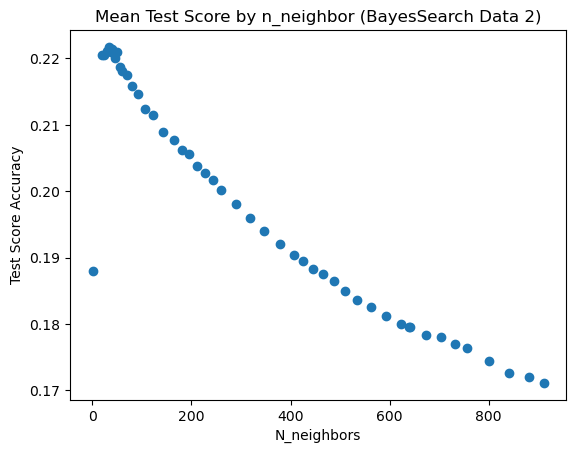

In [20]:
plt.scatter([x["n_neighbors"] for x in bayes_search2_4.cv_results_["params"]], bayes_search2_4.cv_results_['mean_test_score'])
plt.title("Mean Test Score by n_neighbor (BayesSearch Data 2)")
plt.xlabel("N_neighbors")
plt.ylabel("Test Score Accuracy")

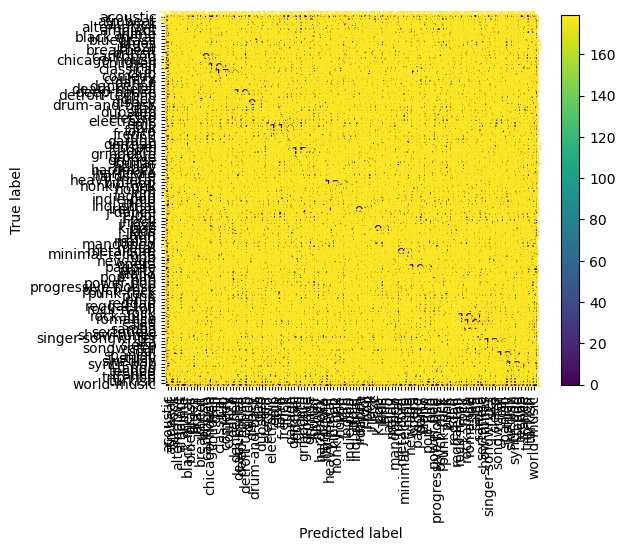

In [21]:
cm2 = confusion_matrix(y_test2_2, knn_test_pred2_4_2)
ax2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels = data2["track_genre"].unique())
ax2.plot()
plt.xticks(rotation=90)
plt.show()

In [27]:
print(classification_report(y_test2_2, knn_test_pred2_4_2))

                   precision    recall  f1-score   support

         acoustic       0.10      0.13      0.11       214
         afrobeat       0.22      0.15      0.18       202
         alt-rock       0.05      0.05      0.05       206
      alternative       0.09      0.10      0.10       201
          ambient       0.25      0.27      0.26       192
            anime       0.09      0.08      0.08       199
      black-metal       0.30      0.43      0.36       195
        bluegrass       0.17      0.44      0.25       178
            blues       0.18      0.08      0.11       229
           brazil       0.09      0.12      0.11       206
        breakbeat       0.37      0.34      0.35       200
          british       0.08      0.05      0.06       187
         cantopop       0.12      0.09      0.10       222
    chicago-house       0.39      0.48      0.43       203
         children       0.20      0.17      0.18       201
            chill       0.16      0.13      0.15       

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=3da032f1-e5ab-4726-ac09-eb3d9c053730' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>